In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv("data2.csv", sep=";")
print("Dimension = {}".format(data.shape))
data.head()

Dimension = (4999, 24)


,CA,ResultatNet,ValeurAjoutee,EBE,ResultatExploitation,ActifsEconomiques,FondsPropresNet,TotalBilan,FondsRoulement,BFR,...,Tresorerie,ChargesFinancieres,DMLT,ChargesPersonnel,AchatsConsommes,AchatsTTC,MoyenneStocks,MoyenneCreances,MoyenneDettesFournisseurs,Defaut
0,14605392,2315154,5853449,4410064,3693014,3635532,5676520,46303080,2704587,1826645,...,877942,2594541,5444598,2873239,2191592,3487535,2637960,1666487,2477802,1
1,53272888,6661838,11972339,8971458,19931451,15557881,9662577,"44412253,33",7108976,10340452,...,-3231476,6357126,18814407,8169904,9444683,12145854,7502606,9552959,6715113,1
2,3203319,539512,1074096,767766,1565764,923807,917360,"4150092,308",629108,570144,...,58964,519213,710273,408069,381126,576979,455580,506077,391513,0
3,62835118,6874740,21770635,15253541,26499322,19654341,10286202,76386000,8835558,4396590,...,4438968,7228236,17660955,11446605,11422598,14122323,7997777,6736956,10338143,0
4,45609392,2494263,18540772,14414222,15830976,11900434,12989752,"22675118,18",4673809,4863777,...,-189968,6950364,15726461,7101591,5158996,9496441,9094199,4891274,9121696,1


In [2]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


# I) CONSTRUCTION DU DATASET
## 1) Libellé des Ratios et Fonction de convertion du texte en float
## 2) Construction des Ratios et de la variable expliqué

## I.1) Libellé des Ratios et Fonction de convertion

In [3]:
# Récupération de la taille de l'échantillon
n = data.shape[0]
# Libellé des Ratios
features = ['RN_CA','REX_AE','EBE_CA','REX_CA','FPN_TB','FR_BFR','CP_AI','FPN_AIhp', 'CFN_CA', 'TN_CA', 'CharFin_EBE','CharFin_REX','DMLT_CFN','DMLT_EBE','DMLT_CP','CharFin_CA', 'DMLT_FPN', 'CP_TB','CharFin_VA','AI_CA','CharPers_CA','D_CLT','D_STK','D_Fourn', 'FR_CA']
nRatios = len(features)
X = np.zeros((n,len(features)))
ylist = list()
print(X.shape)

(4999, 25)


In [4]:
# Fonction Permettant de convertir en float les nombre dont le séparateur décimal est la virgule ','
def toFloat(str0):
    value = 0
    if type(str0) == str:
        elmts = str0.split(sep=',')
        str1 = elmts[0]
        if len(elmts) > 1 :
            str1 += '.' + elmts[1]
        value = float(str1)
    else:
        value = float(str0)
    return value
#print(float(2.5))

## I.2) Construction des Ratios et de la variable expliqué

In [5]:
for i in range(n):
    X[i][0] = data.ResultatNet[i]/data.CA[i]
    X[i][1] = data.ResultatExploitation[i]/data.ActifsEconomiques[i]
    X[i][2] = data.EBE[i]/data.CA[i]
    X[i][3] = data.ResultatExploitation[i]/data.CA[i]
    X[i][4] = toFloat(data.FondsPropresNet[i])/toFloat(data.TotalBilan[i])
    X[i][5] = data.FondsRoulement[i]/toFloat(data.BFR[i])
    X[i][6] = data.CapitauxPermanents[i]/data.ActifsImmobilises[i]
    X[i][7] = data.FondsPropresNet[i]/data.ActifsImmobilisesHP[i]
    X[i][8] = data.CashFlowNet[i]/data.CA[i]
    X[i][9] = toFloat(data.Tresorerie[i])/data.CA[i]
    X[i][10] = data.ChargesFinancieres[i]/data.EBE[i]
    X[i][11] = data.ChargesFinancieres[i]/data.ResultatExploitation[i]
    X[i][12] = data.DMLT[i]/data.CashFlowNet[i]
    X[i][13] = data.DMLT[i]/data.EBE[i]
    X[i][14] = data.DMLT[i]/data.CapitauxPermanents[i]
    X[i][15] = data.ChargesFinancieres[i]/data.CA[i]
    X[i][16] = data.DMLT[i]/data.FondsPropresNet[i]
    X[i][17] = toFloat(data.CapitauxPermanents[i])/toFloat(data.TotalBilan[i])
    X[i][18] = data.ChargesFinancieres[i]/data.ValeurAjoutee[i]
    X[i][19] = data.ActifsImmobilises[i]/data.CA[i]
    X[i][20] = data.ChargesPersonnel[i]/data.CA[i]
    X[i][21] = (data.MoyenneCreances[i]*360)/data.CA[i]
    X[i][22] = (data.MoyenneStocks[i]*360)/data.AchatsConsommes[i]
    X[i][23] = (data.MoyenneDettesFournisseurs[i]*360)/data.AchatsTTC[i]
    X[i][24] = data.FondsRoulement[i]/data.CA[i]
    ylist.append(int(data.Defaut[i]))
y = np.array(ylist)
del(ylist)
print(X)
print(y)
# Fonction d'obtention d'un ratio
def getRatio(index, X_data):
    n0 = len(X_data)
    R = list()
    for i in range(n0):
        R.append(X_data[i][index])
    return R

[[ 1.58513650e-01  1.01581117e+00  3.01947664e-01 ...  4.33322261e+02
   2.55770543e+02  1.85177296e-01]
 [ 1.25051189e-01  1.28111605e+00  1.68405700e-01 ...  2.85974464e+02
   1.99034228e+02  1.33444539e-01]
 [ 1.68422814e-01  1.69490381e+00  2.39678284e-01 ...  4.30326978e+02
   2.44280433e+02  1.96392554e-01]
 ...
 [-5.08913742e-02  1.03097228e+00  3.42940981e-01 ...  5.91128793e+02
   2.50279511e+02  1.00121803e-01]
 [-1.06195935e-02  9.71568077e-01  1.59251705e-01 ...  5.18830538e+02
   2.72948805e+02  1.43019903e-01]
 [ 2.40523072e-01  2.22911311e+00  2.15992785e-01 ...  4.61307744e+02
   3.06323353e+02  1.83796783e-01]]
[1 1 0 ... 1 1 0]


# II) DESCRIPTION DES DONNEES
## 1) Test de Skewness
## 2) Test de Kurtosis
## 3) Test de Normalité de Shapiro Wilk
## 4) Test de correlation lineaire (Statistique de pearson)
## 5) ANOVA à un facteur (Test de Fisher)

## II.1) Test de Skewness

In [6]:
from scipy.stats import skew
positiveSkew = list()
negativeSkew = list()
nullSkew = list()
for j in range(nRatios):
    currentSkew = skew(getRatio(j, X))
    if currentSkew > 0:
        positiveSkew.append('R'+str(j+1))
    elif currentSkew < 0:
        negativeSkew.append('R'+str(j+1))
    else:
        nullSkew.append('R'+str(j+1))
print("Skewness Positif - Distribution décalée à gauche")
print('\t'+ str(positiveSkew))
print("Skewness Négatif - Distribution décalée à droite")
print('\t'+ str(negativeSkew))
print("Skewness Nul - Variable symétrique (Comme pour une distribution Normale)")
print('\t'+ str(nullSkew))

Skewness Positif - Distribution décalée à gauche
	['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R11', 'R12', 'R13', 'R14', 'R15', 'R17', 'R18', 'R19', 'R20', 'R23', 'R24', 'R25']
Skewness Négatif - Distribution décalée à droite
	['R9', 'R10', 'R16', 'R21', 'R22']
Skewness Nul - Variable symétrique (Comme pour une distribution Normale)
	[]


## II.2) Test de Kurtosis

In [7]:
from scipy.stats import kurtosis
positiveKurtosis = list()
negativeKurtosis = list()
nullKurtosis = list()
for j in range(nRatios):
    currentKurtosis = kurtosis(getRatio(j, X))
    if currentKurtosis > 0:
        positiveKurtosis.append('R'+str(j+1))
    elif currentKurtosis < 0:
        negativeKurtosis.append('R'+str(j+1))
    else :
        nullKurtosis.append('R'+str(j+1))

print("Kurtosis Positif - Distribution Pointue")
print('\t'+ str(positiveKurtosis))
print("Kurtosis Négatif - Distribution applatie")
print('\t'+ str(negativeKurtosis))
print("Kurtosis Nul - Distribution ni pointue ni applatie (comme une loi normale)")
print('\t'+ str(nullKurtosis))

Kurtosis Positif - Distribution Pointue
	['R2', 'R5', 'R6', 'R7', 'R8', 'R11', 'R12', 'R14', 'R15', 'R17', 'R18', 'R19']
Kurtosis Négatif - Distribution applatie
	['R1', 'R3', 'R4', 'R9', 'R10', 'R13', 'R16', 'R20', 'R21', 'R22', 'R23', 'R24', 'R25']
Kurtosis Nul - Distribution ni pointue ni applatie (comme une loi normale)
	[]


## II.3) Test de Normalité de Shapiro Wilk

In [8]:
from scipy.stats import shapiro

for j in range(nRatios):
	stat, p = shapiro(getRatio(j, X))
	print('R' + str(j+1) + ' :','stat=%.3f, p=%.3f' % (stat, p))
	if p > 0.05:
		print('\tProbablement Gaussienne')
	else:
		print('\tProbablement non Gaussienne')

R1 : stat=0.956, p=0.000
	Probablement non Gaussienne
R2 : stat=0.948, p=0.000
	Probablement non Gaussienne
R3 : stat=0.970, p=0.000
	Probablement non Gaussienne
R4 : stat=0.995, p=0.000
	Probablement non Gaussienne
R5 : stat=0.011, p=0.000
	Probablement non Gaussienne
R6 : stat=0.666, p=0.000
	Probablement non Gaussienne
R7 : stat=0.957, p=0.000
	Probablement non Gaussienne
R8 : stat=0.958, p=0.000
	Probablement non Gaussienne
R9 : stat=0.956, p=0.000
	Probablement non Gaussienne
R10 : stat=0.999, p=0.000
	Probablement non Gaussienne
R11 : stat=0.961, p=0.000
	Probablement non Gaussienne
R12 : stat=0.953, p=0.000
	Probablement non Gaussienne
R13 : stat=0.966, p=0.000
	Probablement non Gaussienne
R14 : stat=0.956, p=0.000
	Probablement non Gaussienne
R15 : stat=0.960, p=0.000
	Probablement non Gaussienne
R16 : stat=0.952, p=0.000
	Probablement non Gaussienne
R17 : stat=0.936, p=0.000
	Probablement non Gaussienne
R18 : stat=0.012, p=0.000
	Probablement non Gaussienne
R19 : stat=0.962, p

## II.4) Test de correlation de Pearson (Test de corrélation linéaire)

In [9]:
from scipy.stats import pearsonr
ratiosList = list(range(nRatios))
#print(ratiosList)
linearGroups = list()
indexLinearGroups = list()
pos = 0
while ratiosList:
	#print(ratiosList)
	correlated = list()
	group = list()
	j = ratiosList[0]
	correlated.append(j)
	group.append('R'+str(j))
	ratiosList.remove(j)

	Rn = getRatio(j, X)
	for k in ratiosList:
		Rm = getRatio(k, X)
		stat, p = pearsonr(Rn, Rm)
		#print('(R' + str(j+1) + ', R' + str(k+1) + ')','stat=%.3f, p=%.3f' % (stat, p))
		if p <= 0.05:
			correlated.append(k)
			group.append('R'+str(k))
	print("Goupe ",pos)
	print("\t"+ str(group))
	pos +=1
	indexLinearGroups.append(correlated.copy())
	linearGroups.append(group)
	correlated.remove(j)
	for el in correlated:
		ratiosList.remove(el)

Goupe  0
	['R0', 'R17', 'R24']
Goupe  1
	['R1', 'R3', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R18', 'R20']
Goupe  2
	['R2']
Goupe  3
	['R4']
Goupe  4
	['R5', 'R9', 'R19', 'R21', 'R22', 'R23']
Goupe  5
	['R6', 'R7']
Goupe  6
	['R8']


In [10]:
X_noLC = np.zeros((n,len(indexLinearGroups)))
for i in range(n):
    j = 0
    for grp in indexLinearGroups:
        X_noLC[i][j] = X[i][grp[0]]
        j+=1

In [11]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
def getRatioByClass(index, X_data, y):
    n0 = len(X_data)
    class0 = list()
    class1 = list()
    for i in range(n0):
        if y[i] ==1 :
            class1.append(X_data[i][index])
        else:
            class0.append(X_data[i][index])
    return(class0,class1)

indexSelect = list()
for i in range(nRatios):
    classes = getRatioByClass(i, X, y)
    stat, p = f_oneway(classes[0], classes[1])
    #stat1, p1 = ttest_ind(classes[0], classes[1])
    print('R'+str(i+1)+' stat=%.3f, p=%.3f' % (stat, p))
    #print('Student R'+str(i+1)+' stat=%.3f, p=%.3f' % (stat1, p1))
    if p > 0.05:
        print('\t Selection : NON')
    else:
        indexSelect.append(i)
        print('\t Selection : OUI')
print('Liste des ratios sélectionnés')
print(indexSelect)

R1 stat=161.130, p=0.000
	 Selection : OUI
R2 stat=793.276, p=0.000
	 Selection : OUI
R3 stat=0.386, p=0.534
	 Selection : NON
R4 stat=5042.765, p=0.000
	 Selection : OUI
R5 stat=2.994, p=0.084
	 Selection : NON
R6 stat=28.348, p=0.000
	 Selection : OUI
R7 stat=0.160, p=0.689
	 Selection : NON
R8 stat=0.981, p=0.322
	 Selection : NON
R9 stat=2.257, p=0.133
	 Selection : NON
R10 stat=38.516, p=0.000
	 Selection : OUI
R11 stat=98.922, p=0.000
	 Selection : OUI
R12 stat=2101.579, p=0.000
	 Selection : OUI
R13 stat=1201.827, p=0.000
	 Selection : OUI
R14 stat=838.575, p=0.000
	 Selection : OUI
R15 stat=1097.341, p=0.000
	 Selection : OUI
R16 stat=289.271, p=0.000
	 Selection : OUI
R17 stat=798.020, p=0.000
	 Selection : OUI
R18 stat=3.627, p=0.057
	 Selection : NON
R19 stat=105.176, p=0.000
	 Selection : OUI
R20 stat=1.588, p=0.208
	 Selection : NON
R21 stat=265.274, p=0.000
	 Selection : OUI
R22 stat=10.142, p=0.001
	 Selection : OUI
R23 stat=2.367, p=0.124
	 Selection : NON
R24 stat=9.90

In [12]:
X_select = np.zeros((n,len(indexSelect)))
for i in range(n):
    j = 0
    for k in indexSelect:
        X_select[i][j] = X[i][k]
        j+=1

# II) CONSTRUCTION DU MODEL

In [13]:
model = LogisticRegression(solver='newton-cg', verbose=1, max_iter = 1000, C = 1).fit(X_select,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [14]:
model.classes_

array([0, 1])

In [15]:
model.intercept_

array([-2.49490913])

In [16]:
model.coef_

array([[-5.78647598e+00, -3.56954307e-01, -8.79941656e+00,
        -1.59602090e-01, -2.44541021e+00, -3.28522833e+00,
         1.23918594e+01,  1.78954671e-01,  2.11071884e+00,
         5.55528106e-01, -3.45304902e-02,  5.14366949e-01,
        -1.17942126e+00,  4.46566008e+00,  9.09601555e-03,
        -1.89322245e-03, -1.40861755e+00]])

In [17]:
confusion_matrix(y, model.predict(X_select))

array([[1991,  306],
       [ 333, 2369]], dtype=int64)

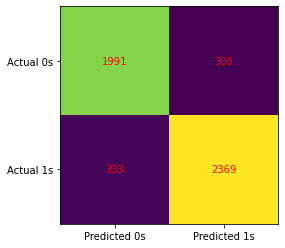

In [18]:
cm = confusion_matrix(y, model.predict(X_select))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()